# Расчетное задание по математической статистике

In [1]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека дл работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # стиль графиков
%matplotlib inline

# Задание №1
# (Построение доверительных интервалов уровня $1-\varepsilon$)

Дана выборка:

$\vec{X^T}$ = {1.410 0.714 -0.401 1.528 0.909 1.569 1.537 -0.069 -1.235 0.418
1.470 1.401 0.413 0.161 0.847 1.590 0.418 0.434 1.117 -0.227
2.040 0.151 0.107 3.197 0.932 0.036 0.351 2.080 0.718 2.264
0.764 1.856 1.034 1.399 1.708 1.075 1.518 0.703 1.371 0.826
1.809 0.175 0.115 0.382 0.818 -0.909 2.651 1.918 1.808 2.523 }


C заранее известным распределением и параметрами:
$\vec{X} \ \sim \mathcal{N}(\alpha,\,\sigma^{2})$
$\alpha=1,\sigma^{2}=0.7$

In [2]:
# Перевод из строки в массив чисел X
stroka="1.410 0.714 -0.401 1.528 0.909 1.569 1.537 -0.069 -1.235 0.418 1.470 1.401 0.413 0.161 0.847 1.590 0.418 0.434 1.117 -0.227 2.040 0.151 0.107 3.197 0.932 0.036 0.351 2.080 0.718 2.264 0.764 1.856 1.034 1.399 1.708 1.075 1.518 0.703 1.371 0.826 1.809 0.175 0.115 0.382 0.818 -0.909 2.651 1.918 1.808 2.523"



#stroka="1.009 0.723 1.093 -0.925 -0.106 0.201 -0.291 -0.338 -1.452 -0.552 -0.374 -0.287 0.340 -0.310 0.231 0.145 0.063 -0.300 -0.621 0.039 -0.138 0.704 -0.172 -0.603 0.043 0.253 -0.872 0.055 -0.620 -0.430 0.646 1.401 -0.289 0.188 0.096 0.679 0.118 -0.343 0.847 -0.275 0.599 0.119 -0.471 -0.234 -0.068 -0.262 0.430 -1.649 1.483 -0.261"
X=np.array([float(i) for i in stroka.split(" ")])


1) Гистограмма и график плотности данного распределения

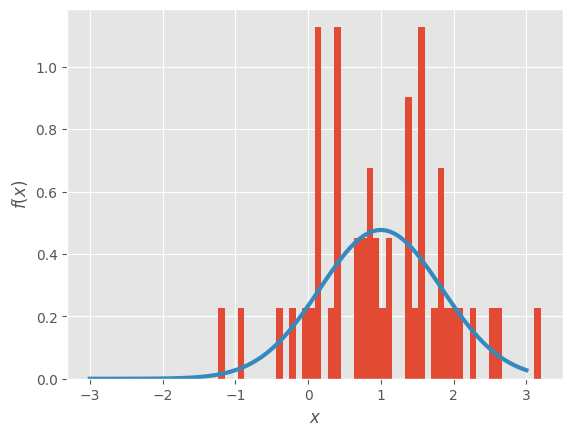

In [3]:
norm_rv = stats.norm(loc=1, scale=0.7**0.5)
std_norm=stats.norm(loc=0, scale=1)
student=stats.t(len(X)-1)
chi=stats.chi2(len(X)-1)
chi_n=stats.chi2(len(X))
x=np.linspace(-3,3,100)



# гистограмма, параметр density отнормировал её. 
plt.hist(X, bins=50, density=True)

pdf = norm_rv.pdf(x)

# плотность 
plt.plot(x, pdf, lw=3)

plt.ylabel('$f(x)$')
plt.xlabel('$x$');

2) Мои параметры 

In [4]:
epsilon=0.14
alpha=1
D=0.7
n=len(X)

3.Подсчет доверительных интервалов

а) $\alpha$, если известно $\sigma^2$

$\alpha^{\pm}=\overline{X}\pm \frac{\sqrt{\sigma^2}}{\sqrt{n}}\tau_{1-\frac{\varepsilon}{2}}$

где $\tau_{1-\frac{\varepsilon}{2}}$ - квантиль уровня $1-\frac{\varepsilon}{2}$   нормального распределения $\sim \mathcal{N}(\alpha, \sigma^2)$

In [5]:

# 0.99
a_,a_plus=(np.mean(X)+(D/n)**0.5*std_norm.ppf(epsilon/2),np.mean(X)+(D/n)**0.5*std_norm.ppf(1-epsilon/2))
print(a_,a_plus)

0.8138620506821884 1.1630979493178117


б) $\alpha$ ,если неизвестно $\sigma^2$

$\alpha_n^{\pm}=\overline{X}\pm \frac{S_0}{\sqrt{n}}\tau_{1-\frac{\varepsilon}{2}}$

где $\tau_{1-\frac{\varepsilon}{2}}$ - квантиль уровня $1-\frac{\varepsilon}{2}$   распределения Стьюдента $T_{n-1}$

In [8]:

S_0=(np.mean(np.power(X,2))-np.mean(X)**2)*(n/(n-1))**0.5
a_,a_plus=(np.mean(X)+S_0/((n)**0.5)*student.ppf(epsilon/2)),(np.mean(X)+S_0/((n)**0.5)*student.ppf(1-epsilon/2))
print(a_,a_plus)



0.817526192913067 1.1594338070869332


в) $\sigma^2$, если известно $\alpha$

${\sigma^2}_{n}^{-}=\frac{n\overline{(X-\alpha)^2}}{\tau _{1-\frac{\varepsilon}{2}}}$

${\sigma^2}_{n}^{+}=\frac{n\overline{(X-\alpha)^2}}{\tau _{\frac{\varepsilon}{2}}}$

где $\tau_{1-\frac{\varepsilon}{2}},\tau_{\frac{\varepsilon}{2}}$ - квантили уровня $1-\frac{\varepsilon}{2},\frac{\varepsilon}{2}$   распределения Хи-квадрат $\chi^2_{n}$

In [7]:

S_2=np.mean((X-alpha)**2)
#sigma_n=(np.pi/2)**0.5*np.mean(abs(X-alpha))
a_,a_plus=( n*S_2/chi_n.ppf(1-epsilon/2), n*S_2/chi_n.ppf(epsilon/2))
print(a_,a_plus)


0.6093941399800246 1.1049079833712208


г) $\sigma^2$, если неизвестно $\alpha$

${\sigma^2}_{n}^{-}=\frac{nS^2}{\tau _{1-\frac{\varepsilon}{2}}}$

${\sigma^2}_{n}^{+}=\frac{nS^2}{\tau _{\frac{\varepsilon}{2}}}$

где $\tau_{1-\frac{\varepsilon}{2}},\tau_{\frac{\varepsilon}{2}}$ - квантили уровня $1-\frac{\varepsilon}{2},\frac{\varepsilon}{2}$   распределения Хи-квадрат $\chi^2_{n-1}$

In [8]:
S=(np.mean(np.power(X,2))-np.mean(X)**2)
#sigma_n=(np.pi/2)**0.5*np.mean(abs(X-alpha))
a_,a_plus=(  n*S/chi.ppf(1-epsilon/2), n*S/chi.ppf(epsilon/2))
print(a_,a_plus)


0.6201795636113876 1.131388181829518


In [9]:
print("Среднее:",np.mean(X))
print("выборочная Дисперсия:",(np.mean(np.power(X,2))-np.mean(X)**2))
print("Выборочное с известным а:",np.mean((X-alpha)**2))
print("S_0:",(np.mean(np.power(X,2))-np.mean(X)**2)*(n/(n-1)))
print("S_1:",np.mean((X-alpha)**2))
print("Квантили нормальное распределение:",std_norm.ppf(1-epsilon/2),std_norm.ppf(epsilon/2))
print("Квантили  стюдента:",student.ppf(1-epsilon/2),student.ppf(epsilon/2))
print("Квантили хи-квадрат n:",chi_n.ppf(1-epsilon/2),chi_n.ppf(epsilon/2))
print("Квантили хи-квадрат n-1:",chi.ppf(1-epsilon/2),chi.ppf(epsilon/2))




Среднее: 0.9884800000000001
выборочная Дисперсия: 0.7977214095999996
Выборочное с известным а: 0.7978541200000001
S_0: 0.8140014383673465
S_1: 0.7978541200000001
Квантили нормальное распределение: 1.47579102817917 -1.4757910281791706
Квантили  стюдента: 1.5001185065455105 -1.500118506545511
Квантили хи-квадрат n: 65.46289729879526 36.10500295081774
Квантили хи-квадрат n-1: 64.31374527683259 35.25409856721499


# Задание №2: По наблюдениям из второй выборки проверить гипотезу о том, что она принадлежит $U[0,1]$

 

Дана выборка $\vec{X} \sim F (F-какое-то)$

Гипотеза-0: - $H_0=\{ F \sim U[0,1] \}$

Гипотеза-1: - $H_1=\{ F - неравномерное \}$

In [10]:
stroka="0.932 0.334 0.516 0.104 0.805 0.190 0.064 0.250 0.844 0.362 0.013 0.459 0.269 0.666 0.769 0.129 0.650 0.576 0.574 0.595 0.010 0.679 0.472 0.376 0.234 0.654 0.903 0.620 0.517 0.462"
X=np.array([float(i) for i in stroka.split(" ")])


# a) Критерий Колмогорова


In [23]:
print(sorted(X))

[0.01, 0.013, 0.064, 0.104, 0.129, 0.19, 0.234, 0.25, 0.269, 0.334, 0.362, 0.376, 0.459, 0.462, 0.472, 0.516, 0.517, 0.574, 0.576, 0.595, 0.62, 0.65, 0.654, 0.666, 0.679, 0.769, 0.805, 0.844, 0.903, 0.932]


Аналитическое нахождение статистики колмогорова

In [27]:
def F_graphiexc(X):
   
   X=sorted(X)
   XX=[]
   for i in X:
      XX.append(sum([1 for j in X if j<i])/len(X))
   XX.append(1)   
   return XX   
FF=F_graphiexc(X)
XXX=sorted(X)
maxx=0
for i in range(1,len(FF)):
   if abs(FF[i]-XXX[i-1])>maxx:
      maxx=abs(FF[i]-XXX[i-1])
print(maxx*(30**0.5))

0.8453184804163063


Ф-ии для имперического распр-я(для числ подсчетов) и для графика

In [11]:
n=30
F_uniform=lambda t: t*(0<=t<=1)+1*(t>1)
def F_imper(X,t):
   return sum([1 for i in X if i<t])/len(X)
def F_graph(X,t):
   for i in X:
      if abs(t-i)<0.0005:
         return np.nan
   return sum([1 for i in X if i<t])/len(X)

    

[0.01, 0.012666666666666666, 0.06323333333333334, 0.1011, 0.12263333333333333, 0.17933333333333334, 0.21700000000000003, 0.2252, 0.23586666666666667, 0.29190000000000005, 0.30876666666666663, 0.3107, 0.38116666666666665, 0.3688666666666667, 0.3634666666666666, 0.3917333333333333, 0.3755333333333334, 0.41529999999999995, 0.3981666666666666, 0.3979666666666667, 0.40313333333333334, 0.4124666666666667, 0.39480000000000004, 0.38500000000000006, 0.3758, 0.44316666666666665, 0.45353333333333334, 0.46569999999999995, 0.4965666666666667, 0.4954666666666667]


$D_n\left(F^{*}_n, F_0\right)=\underset{t\in \mathbb{R}}{\sup}\left|F^{*}_n(t)-F_0(t)\right|$ - расстояние Колмогорова, где в нашей задаче $F_0$- равномерная ф-ия распределения



In [12]:
# D_n - ф-ия для подсчета расстояния колм, D=D_n(x)
def D_n(F_imper,F_uniform,X):
   T=np.linspace(0,1,1000000)
   return max([abs(F_imper(X,t)-F_uniform(t)) for t in T ])
D=D_n(F_imper,F_uniform,X)


Критерий Колмогорова эксплатирует данное расстояние, используя пороговое значение, чтобы сделать выбор между двумя гипотезами:

$\delta(x)= \begin{cases}0, & D_n\left(F_n^*, F_0\right) \leqslant c_{\varepsilon} \\ 1, & D_n\left(F_n^*, F_0\right)>c_{\varepsilon}\end{cases}$

1) Факт №1: при больших n (n>100 - хотя бы ) можно воспользоваться асимптотическим критерием Колмогорова:

   т.к. мы знаем, что по т. Колмогорова, если $F_0 \in C(\mathbb{R})$


$$то \lim _{n \rightarrow \infty} P\left(\sqrt{n} \left(F_n^*, F_0\right)<t\right)=K(t),$$

$$
 где\   \   K(t)=\sum_{k=-\infty}^{\infty}(-1)^k e^{-2 k^k t^2} ;
$$

Соответственно можно предположить, что  $\sqrt{n}D_n \sim F \approx K$(- как будто бы это проще, чем считать реальное распр-е $D_n$)

Далее посчитаем для нашей выборки $\sqrt{n}D_n$ - это и будет нашим $c \ $(пороговым значением реально достигаемым), и решим уравнение $K(c)=1-\varepsilon$ относительно $\varepsilon$, это $\varepsilon$  и будет  РДУЗ.(но так как $n=30<<100$- лучше применить вариант ниже) 

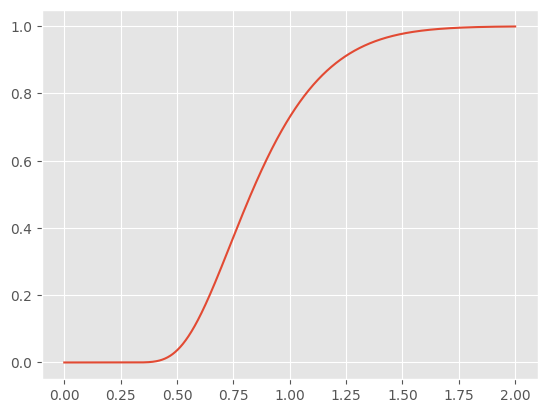

In [13]:
def Kolmogorov(t):
   if t<0.1:
      return 0
   n=100
   return sum([(-1)**(i)*np.e**(-2*t**2*i**2) for i in range(-n,n+1)])
#Вариант с асимптотическим критерием
plt.plot(np.linspace(0,2,1000),[Kolmogorov(i) for i in np.linspace(0,2,1000)])
plt.show()


In [14]:
R=n**0.5*D

print("Ручками:")
print("Статистика Колмогорова:",D,R,n**0.5)
print("РДУЗ:",1-Kolmogorov(R))

#Вариант с асимптотическим критерием из под коробки(scipy)
print("Из-под коробки:",stats.kstest(X, stats.uniform.cdf,args=(), alternative='two-sided',method='asymp'))
print(0.1543333333333333*30**0.5)

Ручками:
Статистика Колмогорова: 0.15433265433265442 0.8453147613764224 5.477225575051661
РДУЗ: 0.47246452593526866
Из-под коробки: KstestResult(statistic=0.15433333333333332, pvalue=0.47245883250466125, statistic_location=0.679, statistic_sign=1)
0.8453184804163062


Вычисления порога $C_{\varepsilon}$ для заданного $\varepsilon=0.14$(естественно оно будет больше, т.к. рдуз>0.14): 

In [15]:
epss=0.14
С_=np.linspace(0,2,100001)
for i in С_:
    if abs(1-Kolmogorov(i)-epss)<0.01:
        print("пороговое значение для статистики при eps=0.14:",i/n**0.5)
        break


пороговое значение для статистики при eps=0.14: 0.2077621205128596


2) Факт №2: $D_n$ - случайная величина, которая (св-во непараметричности) оказывается не зависит от распределения $F_0$ и для $n\leq100$ есть 
таблица со значениями рапсределения, но также есть и  формула для функции распределения $D_n$, она асимптотическая, но при $n\geq 20$ дает приемлимые результаты

$\begin{aligned} & \mathrm{P}\left\{\frac{\left(6 n D_n+1\right)^2}{18 n}<x\right\} =K\left(\sqrt{\frac{x}{2}}\right)-\frac{1}{18 n} \sum_{k=-\infty}^{\infty}(-1)^k e^{-k^2 x}\left[P_k(x)+2 k^4 x-k^2\right]+O\left(\frac{1}{n \sqrt{n}}\right), \\ & \end{aligned}$

где

$$
\begin{aligned}
 P_k(x) =\left[k^2-\frac{1-(-1)^k}{2}\right]\left(1-2 k^2 x\right)+2 k^2 x\left(k^2 x-3\right)
\end{aligned}
$$

In [16]:
# 1) - т.к. n=30<<100 то нужно предпочесть более точный способ асимптотическому

def P(k,x):
    return (k**2-(1-(-1)**k)/2)*(1-2*k**2*x)+2*k**2*x*(k**2*x-3)
def Distr_D(n,x,m=4):
    return Kolmogorov((x/2)**0.5) -1/(18*n)*sum([(-1)**i*np.exp(-i**2*x)*(P(i,x)+2*i**4*x-i**2) for i in range(-m,m)])

# мой точный способ
print("Ручками:")
print("Статистика Колмогорова:",D)
print("РДУЗ:",1-Distr_D(n,((6*n*D+1)**2/(18*n)),10))

#  Вариант с точным критерием из под коробки(scipy)
print("Из-под коробки:",stats.kstest(X, stats.uniform.cdf,args=(), alternative='two-sided',method='exact'))


Ручками:
Статистика Колмогорова: 0.15433265433265442
РДУЗ: 0.42932629271119027
Из-под коробки: KstestResult(statistic=0.15433333333333332, pvalue=0.42933057266114927, statistic_location=0.679, statistic_sign=1)


РДУЗ значительно больше 0.05 => Принимаем гипотезу $H_0$

Вычисления порога $C_{\varepsilon}$ для заданного $\varepsilon=0.14$(естественно оно будет больше, т.к. рдуз>0.14): 

In [17]:
epss=0.14
С_=np.linspace(0,2,100001)
for i in С_:
    if abs(1-Distr_D(n,((6*n*i+1)**2/(18*n)),10))<0.01:
        print("пороговое значение для статистики при eps=0.14:",i/n**0.5)
        break


пороговое значение для статистики при eps=0.14: 0.05291730202243246


# б) Критерий Хи-квадрат


Для критерия Хи-квадрат мы должны разрезать отрезок $[0,1]$ на $m$ непересекающихся частей - $\Delta=\{ \Delta_j|j=1,...,m \}$, 

![](https://cdn.mathpix.com/snip/images/gISJWzcS27O8n1cKOk2x_08k2vs2tZGT4MFVCa_otrs.original.fullsize.png)

Далее:
Обозначим через $p_j=F_0\left(\Delta_j\right)$ вероятности попадания в эти интервалы для распределения $F_0$ 

И через $\nu_j(\nu_j=\overset{n}{\underset{i=1}{\Sigma}} I \{ x_i \in \Delta_j \} )$  - число элементов выборки, попавших в интервал $\Delta_j$.

Проверку гипотезы $H_0$ можно переформулировать в проверку совпадения векторов неизвестных истинных вероятностей $\left(F\left(\Delta_1\right), \ldots, F\left(\Delta_k\right)\right)$ с вектором $\left(p_1, \ldots, p_k\right)$, записав такую сумму:

$$\sum_{i=1}^m \frac{\left(\frac{\nu_i}{n}-p_i\right)^2}{p_i}$$ 
-  это можно понимать как суммы квадратов разностей предпологаемых вероятностей(эмпирических) и "настоящих" на отрезке, взятых отностительно "настоящих" вероятностей - ну типо как относительная погрешность, еще очень грубо можно сказать, что это похоже на $L_{2,1/m}$-сеточную норму, между двумя кусочно-постоянными функциями, которые представляют из себя предполагаемые и "настоящие" вероятности на подобластях отрезка.
Так или иначе эта величина представляют из себя некую меру разности(расстояние) между наблюдаемым(эмпирическим) и "настоящим" распределением и она, !умноженная на n!, называется хи-квадрат статистикой:

$$
\chi^2\left(X_1, \ldots, X_n\right)=\sum_{j=1}^m \frac{\left(\nu_j-n p_j\right)^2}{n p_j} .
$$

$$\delta(x)= \begin{cases}0, & \chi^2 \leqslant c_{\varepsilon} \\ 1, & \chi^2>c_{\varepsilon}\end{cases}$$





Справедлива следующая
Теорема Пирсона. Если гипотеза $H_0$ верна, то при $n \rightarrow \infty$ распределение статистики хи-квадрат слабо сходится к $\chi^2$-распределению с $m-1$ степенью свободы. Следовательно воспользуемся этим фактом аналогично, как и в асимптотическом критерии Колмогорова

Единственная проблема, это то насколько частей разбивать отрезок, это надо вбырать самому...

In [18]:
# Проверка хи-квадрат критерия
m=5
print("m=",m)



# V_1=[sum([1 for j in X if (i-1)/m<j<i/m])/n for i in range(1,m+1)]

 # в соотв-ии с равномерным распредлением посчитанно (список вероятностей одинаковых)


# мой вариант расчета
V=[sum([1 for j in X if (i-1)/m<j<i/m]) for i in range(1,m+1)]
P=[1/m]*m
S=sum([(V[i]-n*P[i])**2/(n*P[i]) for i in range(m)])
chix=stats.chi2(m-1)
print("Ручками:")
print("Статистика хи-квадрат:",S)
print("РДУЗ:",1-chix.cdf(S))

# расчет из под коробки
P_1=[30/m]*m
print("Из-под коробки:",stats.chisquare(V,P_1)) 
#  сюда надо подставлять массив количеств(попадающих в свою итую группу) - V={v_i}, P_1={n*p_i} - вероятности отнормированные на выборку


  
        

m= 5
Ручками:
Статистика хи-квадрат: 1.3333333333333333
РДУЗ: 0.8556951983876534
Из-под коробки: Power_divergenceResult(statistic=1.3333333333333333, pvalue=0.8556951983876534)


 РДУЗ значительно больше 0.05 => принимаем гипотезу $H_0$

Вычисления порога $C_{\varepsilon}$ для заданного $\varepsilon=0.14$:

In [19]:
epss=0.14
С_=np.linspace(9,10,100001)
for i in С_:
    if abs(1-chix.cdf(i)-epss)<0.01:
        print("пороговое значение для статистики при eps=0.14:",i,i/n)
        break


# г) Построение графика для эмпирической функции

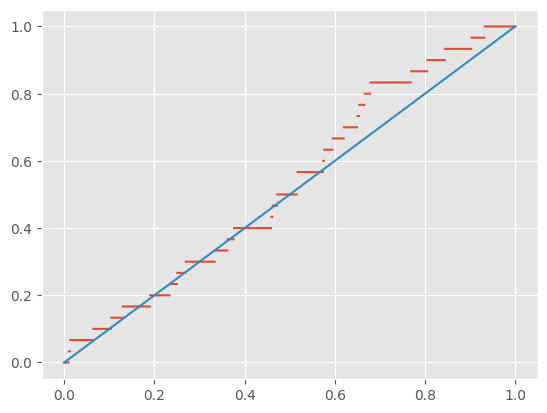

In [21]:
T=np.linspace(0,1,10000)

plt.plot(T,[F_graph(X,t) for t in T],T,T)
plt.show()

# Задание № 3 Критерий Стьюдента,Фишера(Проверка средних,дисперсий)

Изначальную выборку $\vec{X}$  разбиваем на две $n=20$ и $m=30$

In [28]:
n=20
m=30
# Перевод из строки в массив чисел X
stroka="1.410 0.714 -0.401 1.528 0.909 1.569 1.537 -0.069 -1.235 0.418 1.470 1.401 0.413 0.161 0.847 1.590 0.418 0.434 1.117 -0.227 2.040 0.151 0.107 3.197 0.932 0.036 0.351 2.080 0.718 2.264 0.764 1.856 1.034 1.399 1.708 1.075 1.518 0.703 1.371 0.826 1.809 0.175 0.115 0.382 0.818 -0.909 2.651 1.918 1.808 2.523"



#stroka="1.009 0.723 1.093 -0.925 -0.106 0.201 -0.291 -0.338 -1.452 -0.552 -0.374 -0.287 0.340 -0.310 0.231 0.145 0.063 -0.300 -0.621 0.039 -0.138 0.704 -0.172 -0.603 0.043 0.253 -0.872 0.055 -0.620 -0.430 0.646 1.401 -0.289 0.188 0.096 0.679 0.118 -0.343 0.847 -0.275 0.599 0.119 -0.471 -0.234 -0.068 -0.262 0.430 -1.649 1.483 -0.261"
Z=np.array([float(i) for i in stroka.split(" ")])
X=Z[:20]
Y=Z[20:]

# б) Проверить гипотезу о совпадении средних, если известно, что неизвестные дисперсии совпадают.

Критерии Стьюдента. Постановка задачи: пусть $x_i \in \mathcal{N}_{\left(\alpha, \sigma^2\right)}, y_i \in \mathcal{N}_{\left(\alpha_1, \sigma^2\right)}$, где $\alpha, \alpha_1$ - неизвестны. Критерий Стьюдента проверяет сложную гипотезу $H_0=\left\{\alpha=\alpha_1\right\}$ против конкурирующей альтернативы. Этот критерий основан на статистике
$$
\rho(\vec{X}, \vec{Y})=\sqrt{\frac{n m}{n+m}} \cdot \frac{\bar{X}-\bar{Y}}{\sqrt{\frac{(n-1) S_0^2(\vec{X})+(m-1) S_0^2(\vec{Y})}{n+m-2}}} .
$$

In [29]:
def S_0_2(X,n):
    return(np.mean(np.power(X,2))-np.mean(X)**2)*(n/(n-1)) 
    # выборочная дисперсия
def SS(X,n):
    X_m=np.mean(X)
    return sum([(x_i-X_m)**2 for x_i in X])/(n-1)
Ro=(n*m/(n+m))**0.5*(np.mean(X)-np.mean(Y))/(((n-1)*S_0_2(X,n)+(m-1)*S_0_2(Y,m))/(n+m-2))**0.5
Ro

-1.8927556633771883



$\rho(\vec{X}, \vec{Y})$ - случайная величина, и при верности гипотезы  $H_0$ она имеет распределение Стьюдента $\mathrm{T}_{n+m-2}$.(это целая теорема)
Из этого факта вытекает следующий критерий:

Критерий Стьюдента выглядит как все критерии согласия: при двусторонней альтернативе $H_2=\left\{ \alpha_1 \neq \alpha_2\right\}$
$$
\delta(\vec{X}, \vec{Y})= \begin{cases}H_1, & \text { если }|\rho(\vec{X}, \vec{Y})|<C, \\ H_2, & \text { если }|\rho(\vec{X}, \vec{Y})| \geqslant C,\end{cases}
$$

где число $C=\tau_{1-\varepsilon / 2}$ - квантиль распределения $\mathrm{T}_{n+m-2}$.

In [30]:
eps=0.14
T_cr=stats.t(n+m-2)
C_eps=T_cr.ppf(1-eps/2)
print("РДУЗ:",1-(T_cr.cdf(-Ro)-T_cr.cdf(Ro)))
# print("РДУЗ:",1-(stats.t.cdf(-Ro,n+m-2)-stats.t.cdf(Ro,n+m-2)))
print("Порог для eps=0.14:",C_eps)

РДУЗ: 0.06442871009670459
Порог для eps=0.14: 1.5006339152626929


In [31]:
print("Все тоже, но из-под коробки :",stats.ttest_ind(X,Y))

Все тоже, но из-под коробки : TtestResult(statistic=-1.8927556633771878, pvalue=0.0644287100967046, df=48.0)


$\rho<C$ при  $\varepsilon=0.05$ => следовательно гипотезу можно принять
но при $\varepsilon=0.14$ - это уже не выполняется

Т.к. РДУЗ ~ 0.06 мало уверенности.


# а) Проверить гипотезу о совпадении дисперсий при неизвестных средних.

Критерий Фишера предназначен для проверки гипотезы $H_0=\left\{\sigma_1=\sigma_2\right\}$.

Пусть даны две независимые выборки из нормальных распределений: 

$\vec{X}=$ $\left(X_1, \ldots, X_n\right) \sim \mathcal{N}_{a_1, \sigma_1^2}$ и $\vec{Y}=\left(Y_1, \ldots, Y_m\right) \sim \mathcal{N}_{a_2, \sigma_2^2}$, 

средние которых, вообще говоря, неизвестны. 

Обозначим через $S_0^2(\vec{X})$ и $S_0^2(\vec{Y})$ несмещённые выборочные дисперсии:
$$
S_0^2(\vec{X})=\frac{1}{n-1} \sum_{i=1}^n\left(X_i-\bar{X}\right)^2, \quad S_0^2(\vec{Y})=\frac{1}{m-1} \sum_{i=1}^m\left(Y_i-\bar{Y}\right)^2
$$

и зададим функцию $\rho(\vec{X}, \vec{Y})$ как их отношение $\rho(\vec{X}, \vec{Y})=S_0^2(\vec{X}) / S_0^2(\vec{Y})$.
Удобно, если $\rho>1$. С этой целью выборкой $\vec{X}$ называют ту из двух выборок, несмещённая дисперсия которой больше. Поэтому предположим, что $S_0^2(\vec{X})>S_0^2(\vec{Y})$.

При верной гипотезе $H_0$ величина $\rho(\vec{X}, \vec{Y})$ имеет распределение Фишера $\mathrm{F}_{n-1, m-1}$ с $n-1$ и $m-1$ степенями свободы.
Возьмём квантиль $f_{1-\varepsilon}$ распределения Фишера $\mathrm{F}_{n-1, m-1}$. Критерием Фишера называют критерий
$$
\delta(\vec{X}, \vec{Y})= \begin{cases}H_1, & \text { если } \rho(\vec{X}, \vec{Y})<f_{1-\varepsilon}, \\ H_2 & \text { если } \rho(\vec{X}, \vec{Y}) \geqslant f_{1-\varepsilon} .\end{cases}
$$

In [32]:
print(SS(Y,m)/SS(X,n))
# print(stats.f_oneway(Y,X))

print( 1 - stats.f.cdf(SS(Y,m)/SS(X,n), n-1, m-1))

1.410693707782015
0.19693349286365802


In [33]:
epss=0.14
С_=np.linspace(1,3,1000001)
for ii in С_:
    if abs(1 - stats.f.cdf(ii, n-1, m-1)-epss)<0.01:
        print("пороговое значение для статистики при eps=0.14:",ii)
        break

пороговое значение для статистики при eps=0.14: 1.522368


In [34]:
1 - stats.f.cdf(1.52, n-1, m-1)

0.1508779028432845

In [35]:
S_0_2(X,n)

0.6195262736842105

In [36]:
S_0_2(Y,m)

0.8739618160919538

In [7]:
n=m=100
T_cr=stats.t(n+m-2)
Ro=(n*m/(n+m))**0.5*(45-34)/(((n-1)*9+(m-1)*10)/(n+m-2))**0.5
print("РДУЗ:",1-(T_cr.cdf(Ro)-T_cr.cdf(-Ro)))

РДУЗ: 0.0
